In [4]:
import sys
sys.path.insert(0, "../..")

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.masterequation import MasterEquation
import module.components.CONST as CONST

In [18]:
me = MasterEquation(0.2, 0.03)
net = me.net

phase_space = np.expand_dims(me.phase_space, axis = -1)

probs = me.solve(N = 5000)

In [19]:
def rate_to_particle(n):
    return net.calc_rate_from_electrode(n, 0) + net.calc_rate_from_electrode(n, 1)

def rate_from_particle(n):
    return net.calc_rate_to_electrode(n, 0) + net.calc_rate_to_electrode(n, 1)

def I(n):
    return rate_to_particle(n) - rate_from_particle(n)

def I_dag(n):
    return rate_to_particle(n) + rate_from_particle(n)

def dn2(n):
    return 2 * n[:, 0] * I(n) + I_dag(n)

def mean(n):
    return n[:, 0]

In [20]:
def expect(func, probs):
    return np.sum(func(phase_space) * probs)

## Explanation
We solve the single-electron-transistor by master equation until convergence. Thus, we have found the correct distribution. To check for validity of our equations, we calculate the expectation values of the time derivatives of the first two moments. They should equate to zero, what, joyfully, they do (eps = 1e-11).

Apparently, the change in masterequation and change in first moment have the same order of magnitude.

In [21]:
expect(I, probs)

7.260858581048524e-14

In [22]:
expect(dn2, probs)

2.6290081223123707e-13

### Bonum!
---

Text(0.5, 1.0, 'phase space plot in convergence')

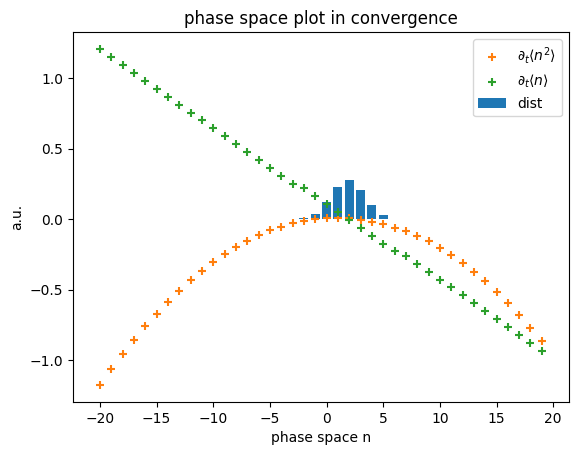

In [26]:
plt.bar(phase_space[:, 0], probs, label = "dist")
plt.scatter(phase_space[:, 0], dn2(phase_space) / 8000, marker = "+", label = "$\\partial_t \\langle n^2 \\rangle$")
plt.scatter(phase_space[:, 0], I(phase_space) / 200, marker = "+", label = "$\\partial_t \\langle n \\rangle$")
plt.legend()
plt.xlabel("phase space n")
plt.ylabel("a.u.")
plt.title("phase space plot in convergence")